## 5 clusters out of the countries using GDP and "Volume of exports of goods"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# import data set
file = '../data/WEOOct2020all.xlsx'
df = pd.read_excel(file)

In [4]:
# Select data for GDP (NGDP_R) and Volume of Exports of goods (TXG_RPCH)
df_gdp = df[df['WEO Subject Code'] == 'NGDP_R']
df_veg = df[df['WEO Subject Code'] == 'TXG_RPCH']

In [5]:
# Merge data on 'Country'
df_merged = df_gdp.merge(df_veg[['Country', 2021]], on='Country', suffixes=('_GDP', '_Exports'))


In [6]:
# Prepare data for clustering
data = df_merged[['2021_GDP', '2021_Exports']].copy()


In [7]:
# Convert non-numeric values to NaN
data = data.apply(pd.to_numeric, errors='coerce')

In [8]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [9]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [10]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

/home/yuvenal/Dev/Take_home/aai/Data_Analysis_Project/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [11]:
# Get cluster labels
cluster_labels = kmeans.labels_

In [12]:
# Assign cluster labels back to the dataframe
data['Cluster'] = cluster_labels

In [13]:
# Function to get top 5 countries based on GDP in each cluster
def get_top_countries_by_gdp(data, cluster_label, top_n=5):
    cluster_data = data[data['Cluster'] == cluster_label]
    top_countries = cluster_data.nlargest(top_n, '2021_GDP')
    return top_countries

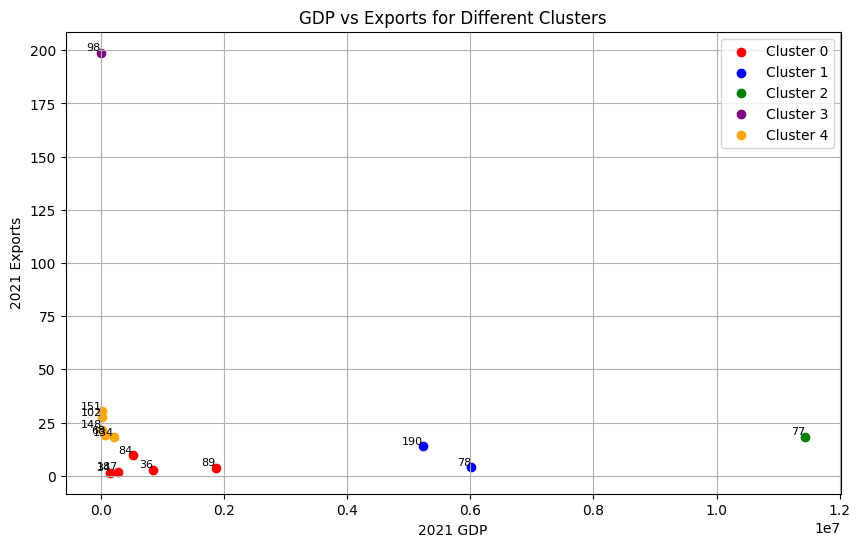

In [14]:
# Scatter plot with labels for top 5 countries in each cluster
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for cluster_label in range(5):
    cluster_data = get_top_countries_by_gdp(data, cluster_label)
    plt.scatter(cluster_data['2021_GDP'], cluster_data['2021_Exports'], color=colors[cluster_label], label=f'Cluster {cluster_label}')
    for _, row in cluster_data.iterrows():
        plt.text(row['2021_GDP'], row['2021_Exports'], row.name, ha='right', va='bottom', fontsize=8, color='black')

# Set axis labels and title
plt.xlabel('2021 GDP')
plt.ylabel('2021 Exports')
plt.title('GDP vs Exports for Different Clusters')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
